### PGA tour EDA - An Analysis of the 2024 PGA Tour

As a passionate golf fan and player, I embarked on this project to combine my love for the sport with my enthusiasm for computer science. Since I started playing golf, I’ve come to realize that what seems like a simple game of putting a ball into a hole is, in fact, incredibly complex, with many factors influencing performance. This project aims to uncover what makes the best players in the world excel at their craft.

Throughout this journey, I’ve learned how to use Python’s pandas library to modify, clean, and merge data, as well as how to effectively present it. The data manipulation processes can be seen in the notebook “PGA_dataset_2024.ipynb,” where I’ve detailed the steps taken to analyze and understand the dataset.

The purpose of this Notebook is to present the data and make theories that I am going to test later with regression models.

It consists of 3 parts:

1. Understanding the Data
2. Correlation within the data
3. Comparison between players
4. Conclusion of my findings



## 1 - understanding the Data 

I am using two two datasets that consists of stats for each of the 184 playes competing on the PGA tour in 2024. 

The file "PGA_Data_Cleaned.csv" consists of 14 columns. where each column represent the stats of an individual player.


* PLAYER_ID - The id of the golf player
* PLAYER - The name of the golf player
* SG_T (Strokes Gained total) - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event
* SG_P (Strokes Gained Putting)- The number of putts from a specific distance is compared to a statistical baseline to calculate strokes gained or lost. A player’s total strokes gained in a round is the difference from the field average, and the sum of strokes gained across rounds is divided by the total rounds played.
* SG_ATG (Strokes Gained around the green)- The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost.
* SG_APP (Strokes Gained on approach to green) - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost.
* SG_OTT (Strokes gained off the tee) - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee.
* Average Score - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played
* Rounds - Number of rounds a player has played that year
* GIR_% (Green in regulations) - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5)
* FWY_% (Hit fairway percentage) - The percentage of time a tee shot comes to rest in the fairway or on the green.
* Drive_Distance - The average number of yards per measured drive. These drives are measured on two holes per round
* Victories - The total number of victories a player has made in 2024. 
* Top 10 - The total number of times the player has finished in the top 10 at official events for the year.

The cvs file "PGA_SG_Cleaned.csv" consists of 12 columns, where each column represent the stats of an individual player. Just like the first file are the first two columns PLAYER_ID and PLAYER. The other columns consist of the 5 SG stats that the previous cvs file has, but also the rank which the player has in each of the different SG category. 



Understanding the 'Strokes Gained' concept can be difficult to interpret, but it is in short a method of analysing each facet of a players game in comparison to the rest of the players in the field. Golfmonlty has an article which explains strokes gained in a good manner in  my opinion:

https://www.golfmonthly.com/features/the-game/what-is-strokes-gained-185460


In [40]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi


#### Loading in the datasets

In [41]:

df = pd.read_csv("PGAdata/PGA_Data_Cleaned.csv", delimiter=',')
SGdf = pd.read_csv("PGAdata/PGA_SG_Cleaned.csv", delimiter=',')


## 2 - Correlation within the Data

#### Making the Correlation matrix

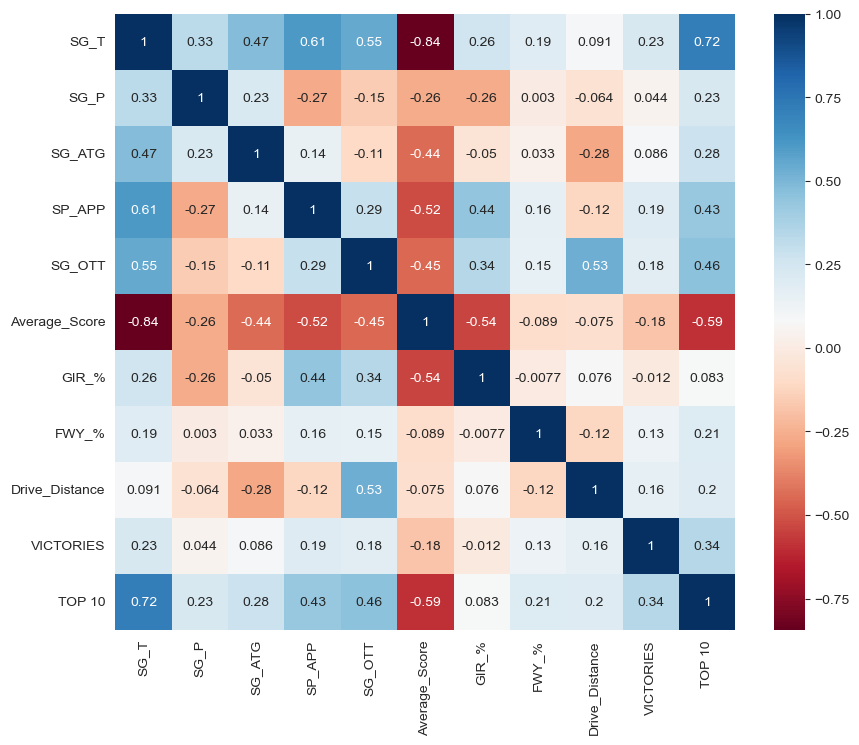

In [42]:

# Creating the df without the players and their Id and rounds 
df_noplayers = df.drop(columns=['PLAYER','PLAYER_ID', 'ROUNDS'])

# Plotting the correlation matrix
data_matrix = df_noplayers.corr(method = "spearman")
plt.figure(figsize=(10,8))
sns.heatmap(data_matrix, cmap = "RdBu", annot=True)
plt.show()
plt.close()


The correlation matrix displays some interesting relationships within the data. 
Firstly, the weighted average score per round (Average_Score) was indeed not the factor with the strongest relationship to top 10 placements. It turned out that the total strokes gained (SG_T) had the msot significant relationship with 0.72. This might because some of the players with the most top 10 placement in 2024, Scottie Scheffler and Rory Mcllroy for example, is outstanding from the teebox possibly resulting in this stat weighing more than the total weighted average score. 

Within the strokes gained (SG) values can you observe that SG on the longer shots, OTT (of the tee) and APP (Approach shots), were more significant for top 10 placements than the SG in the short game, P (Putting) and ATG (Around the green). This indicates that the largest difference from the best and worst players lies in the shots off the tee and to the green.

It makes sence as total SG had the most significant correlation to top 10 placements and within the SG stats did SG_P has 0.33, SG_ATG has 0.47, SG_OTT has 0.55 and SG_APP has 0.61 correlation to the total SG. This builds up on the theory that the longer shots were mroe impactful to being the better player at the PGA tour.


### Comparing putting and Off the tee

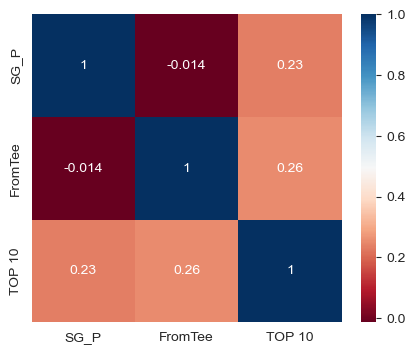

In [43]:

plt.figure(figsize=(5,4))

# multiplying the driver distance with the fairway hit off the tee
df_noplayers['FromTee'] = df_noplayers['Drive_Distance'] * df_noplayers['FWY_%']

data_matrix1 = df_noplayers[['SG_P','FromTee','TOP 10']].corr(method = "spearman")
sns.heatmap(data_matrix1, cmap = "RdBu", annot=True)

plt.show()
plt.close()


This correlation matrix had the intention to compare driver to putting. The driving (FromTee) is a product of Driver Distance and the fairway hit percentage from the tee, where I hoped that it would be a good metric to show the payoff from hiting it far off the tee. However, it doesn't stand out from the putting SG as OTT_SG did, indicating that there are more factors than just distance and fairway hits. 

### Scatterplot to comapre how driver distance affects accuracy

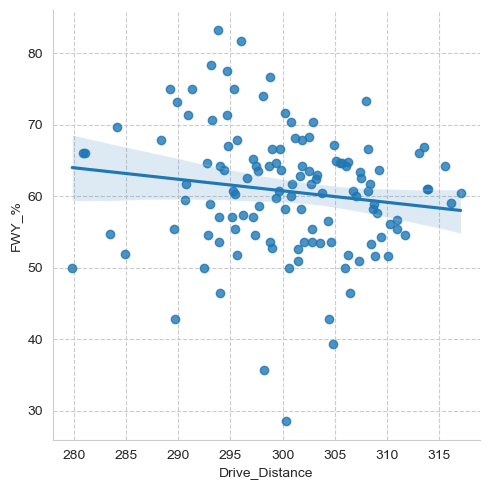

In [45]:

# Filled the missing Accuracy off the tee with the mean of the other players, removing to not weigh the chart
driver_without_mean = df.loc[(df['FWY_%'] < 60.700) | (df['FWY_%'] > 60.702)]

# Plotting the scatterplot
sns.lmplot(data = driver_without_mean, x = "Drive_Distance", y="FWY_%" )


The scatterpot shows the realtionship between the longest hitter and their fair way hit percentage. As expected can we see that the longer hitters has a lower fairway hit percentage than the shorter hitters. I was a little surpised that the diciation was not larger since the dispertion would be bigger. 

## 3 - Comparison between players

To make the lollipop chart do i need to make the values within the data to be on the same distribution range. At the moment i have some percentages that are between 0 and 1 while driving distance are at 300. For this reason did i decide to minimax normalize all the data to be within the range of 0 and 1.

#### Min-Max Normalization

In [46]:

# Function to create a normalized dataframe of the listed columns
def normalize_dataframe(columns):

    norm_df = df.copy()
    for column in columns:
        norm_df[column]= (df[column]-df[column].min())/(df[column].max()-df[column].min())

    return norm_df


# Creating a normalized dataframe 
normalized_df =  normalize_dataframe(['SG_OTT','SG_T', 'SG_P', 'SG_ATG', 'SP_APP', 'Average_Score', 'Drive_Distance', 'FWY_%', 'GIR_%', 'VICTORIES', 'TOP 10'])


### Creating function to plot Lollipop chart

In [47]:

# Extracting the slice of the dataframe and computing the mean of that dataframe
def extract_dataframe(a, b):
    
    desired_dataframe = normalized_df[slice(a,b)].reset_index(drop = True)
    desired_dataframe = desired_dataframe.drop(columns=['PLAYER','PLAYER_ID', 'ROUNDS'])
    desired_dataframe = desired_dataframe.mean().to_frame()
    
    return desired_dataframe


# Function for plotting  a lollipop chart
# It uses the extract dataframe function to gather the two dataframes to compare 
def plot_lollipop (start1, end1, start2, end2, title, description2, description1):

    comparison_1 = extract_dataframe(start1, end1)
    comparison_2 = extract_dataframe(start2, end2)

    plt.figure(figsize = (9, 6))
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    my_range=range(1,len(comparison_1.index)+1)

    ax = plt.axes(frameon=False)
    plt.hlines(y=my_range, xmin=comparison_1[0], xmax=comparison_2[0], color='#8f9c9a', lw =2)
    plt.scatter(comparison_2[0], my_range, color='#0096d7', s=75, label=description2, zorder=2)
    plt.scatter(comparison_1[0], my_range, color='#003953', s=75, label=description1, zorder=2)

    plt.legend(ncol=2, bbox_to_anchor=(1, 1), loc="lower right", frameon=False)
    plt.yticks(my_range, comparison_1.index)
    plt.title(title, loc='left', fontsize=14)
    plt.xlabel('Relative the field (0 = worst, 1 = best) ')
    plt.tight_layout()
    
    plt.show()
    plt.close()


### Plotting three different lollipop charts to analyze the areas the top players perform the best



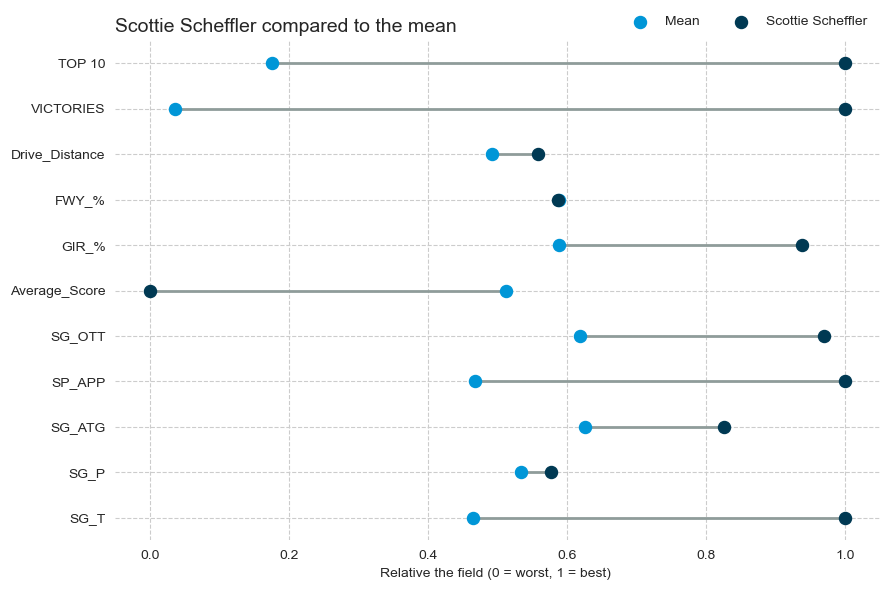

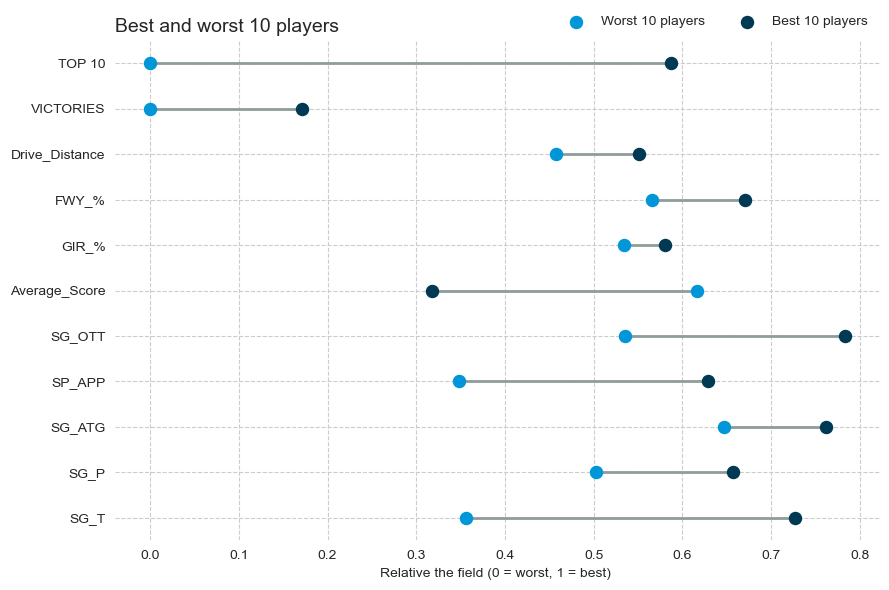

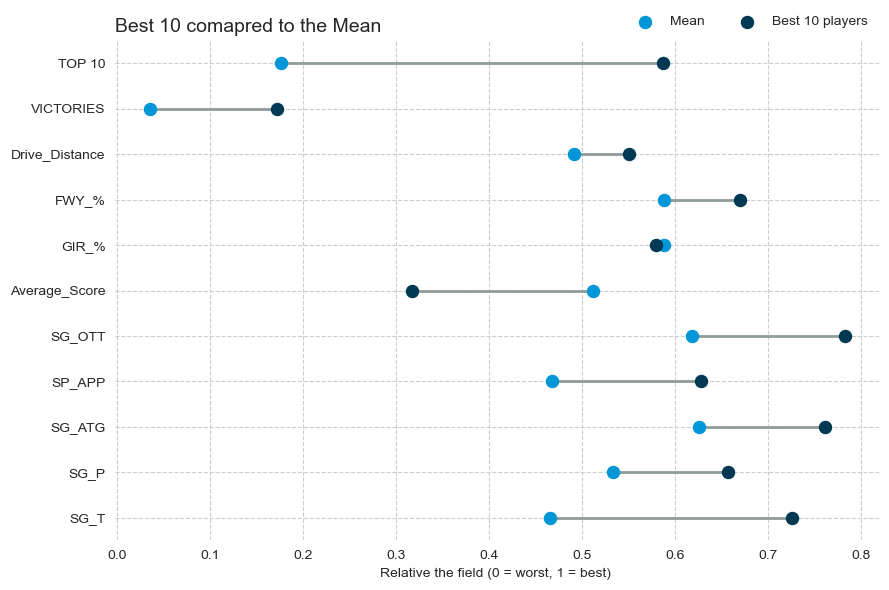

In [48]:

# Comparing Scottie Scheffler to the mean
plot_lollipop(0,1,0,183, "Scottie Scheffler compared to the mean", 'Mean', 'Scottie Scheffler')

# Comparing the best and worst 10 players
plot_lollipop(0,10,173,183, "Best and worst 10 players", 'Worst 10 players', 'Best 10 players')

# The best 10 players comapred to the mean
plot_lollipop(0,10,0,183, "Best 10 comapred to the Mean", 'Mean', 'Best 10 players')


The three lollipop charts displays the relationship between the players. The first interestingly shows that the difference between the undoubtedly best player off, Scottie Scheffler, did not dominate the mean of the field Around the green and with his putting. As the correlation amtrix indecated his dominance in apporach shots and off the tee indicates that they mattered more than the short game. The second graph indicates that the top 10 players also dominated within the SG of the longer shots while the ones around the green were more equal. The last one can indicate the same, however the SG from the longer shots and the around the green are closer here. 

### Making Radar Chart for players SG

In [49]:

# function that takes the number (rank of a players Total SG) and makes it into a SG radar chart
def plot_RadarChart (number):

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'projection': 'polar'})
    categories = ["SG: Total", "SG: Approach to Green", "SG: Off the tee", "SG: Around the green", "SG: Putting"]
    
    values = SGdf[['RANK_T','RANK_APP','RANK_OTT','RANK_ATG','RANK_P']]
    values = values.iloc[number].values.flatten().tolist()
    values += values[:1]
        
    angles = [n / float(5) * 2 * pi for n in range(5)]
    angles += angles[:1]

    plt.yticks([1, 50, 100, 150], ["1", "50", "100", "150"], color="grey", size=12)
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.set_ylim(184,1)
    ax.tick_params(axis='x', pad=15)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(f"{SGdf.iloc[number]['PLAYER']} - Rank: {SGdf.iloc[number]['RANK_T']}", color="#003953", size=16, pad=20 )
    plt.show
    plt.close


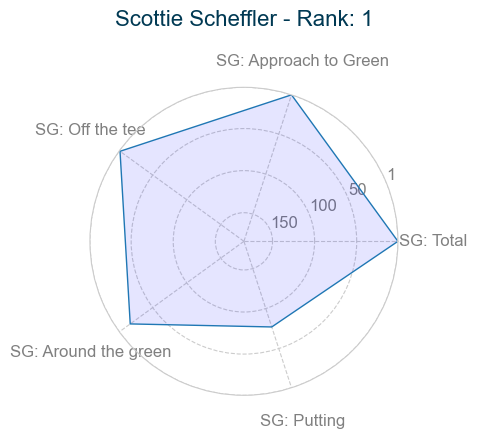

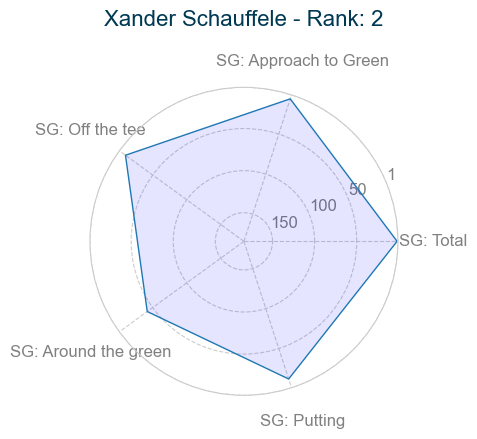

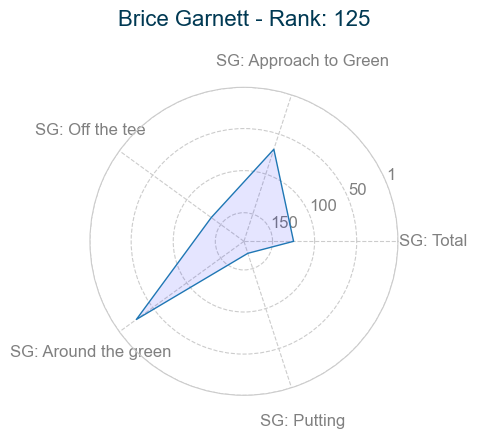

In [50]:
# Plotting charts of the 1. 2. and 125. player 

plot_RadarChart(0)
plot_RadarChart(1)
plot_RadarChart(124)


The Radar charts doesn't give more information about the players than the other chart does, but it is fun as it is often used in games such as EA SPORTS's FIFA to show the stats of a player. However, they are not recommended as a chart since they can be misleading. From the radar chart can we belive that the 2. ranked player would be better than the 1. ranked player since his 'area' is larger, but as we know does the SG related to short game not have the same magnitude that the longer shots have. This shows how the radar chart takes all the values as the same and just the order that they are placed in can largely affect the area ebtween the points.

### Radar Chart for multiple stats

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

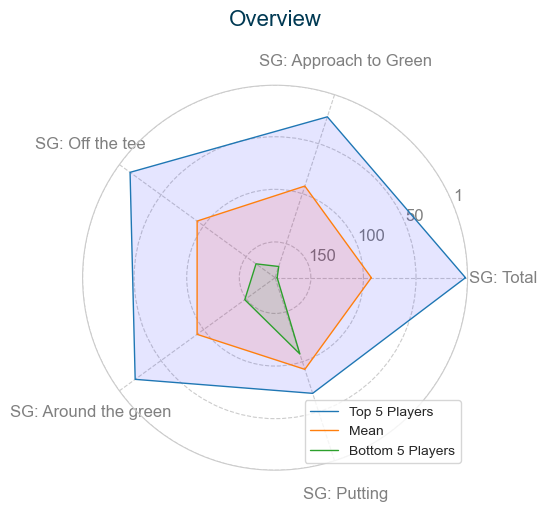

In [51]:

# This plots the same radar chart as before, just with multiple values
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
categories = ["SG: Total", "SG: Approach to Green", "SG: Off the tee", "SG: Around the green", "SG: Putting"]
values = SGdf[['RANK_T','RANK_APP','RANK_OTT','RANK_ATG','RANK_P']]

values2 = values.iloc[:5].mean()
values2 = values2.tolist()
values2 += values2[:1]

values3 = values.iloc[-5:].mean()
values3 = values3.tolist()
values3 += values3[:1]

values4 = values.iloc[:].mean()
values4 = values4.tolist()
values4 += values4[:1]


angles = [n / float(5) * 2 * pi for n in range(5)]
angles += angles[:1]

plt.yticks([1, 50, 100, 150], ["1", "50", "100", "150"], color="grey", size=12)

ax.set_ylim(184,1)

plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.tick_params(axis='x', pad=15)

ax.plot(angles, values2, linewidth=1, linestyle='solid')
ax.plot(angles, values4, linewidth=1, linestyle='solid')
ax.plot(angles, values3, linewidth=1, linestyle='solid')

ax.fill(angles, values2, 'b', alpha=0.1)
ax.fill(angles, values4, 'r', alpha=0.1)
ax.fill(angles, values3, 'g', alpha=0.1)

plt.title("Overview", color="#003953", size=16, pad=20 )
plt.legend(["Top 5 Players", "Mean", "Bottom 5 Players"], loc="lower right")

plt.show
plt.close


This radar chart displays where the top 5, mean and bottom 5 differ the most. The bottom 5 perform worst on the approach to the green, while performing best on putting. The putting SG of the worst are still lower than of the mean and top 5, but it is significally closer than the other SG stats. 

### Comparing the different SG ranks of the 10 players with the highest total SG

In [64]:

# finding the mean rank of the various SG stats of the players with the highest SG
average_p_rank = SGdf.head(10)['RANK_P'].mean()
average_OTT_rank = SGdf.head(10)['RANK_OTT'].mean()
average_APP_rank = SGdf.head(10)['RANK_APP'].mean()
average_ATG_rank = SGdf.head(10)['RANK_ATG'].mean()

print("Average Rank of Top 10 Players by:")
print(f"SG: Putting Rank: {average_putting_rank}")
print(f"SG: Off the tee Rank: {average_OTT_rank}")
print(f"SG: Approach shot: {average_APP_rank}")
print(f"SG: Around the green Rank: {average_ATG_rank}")

Average Rank of Top 10 Players by:
SG: Putting Rank: 77.1
SG: Off the tee Rank: 24.5
SG: Approach shot: 30.2
SG: Around the green Rank: 28.6


These results supports the finding from the correlation data that SG from Off the tee and Approach are important, but it also shows that the top 10 players ranked highly around the green as well, indicating that the players do not vary that much within the putting area.

## Conclusion to the findings 

#### Notebook observations 

The notebook displays some interesting stats about the players that were the most succesful on the 2024 PGA tour.

* Putting was not the attribute that the best players stood out on (Is putting overrated or is the level so high on the PGA tour little differentiate them?)
* The longer shots (off the tee and approach shots) were central in being succesful. (HAve this always been the case or is it just for this year?)
* The best players tend to hit it their drives further. What is the payoff of hitting it further if your accuracy goes down?


#### Take into consideration:

* This data shows a single year of the PGA tour and data from the other years might differentiate on what aspect is the best.
* Basing their success on their top 10 placements might not portrait who has played the best golf on average. e.g. A player who has one top 10 placements but averages under top 30 will rank higher than a player who has no top 10 placements but is always between top 10 and top 20. 
* Since just the average stats of the player is displayed, the data can be misleading. e.g. a player who were the best in the world for a month, but played horrible the rest of the year should have a higher chance of winning than a player who is on average a better player, but never in the winning possition. but my data would not show taht.


#### Moving forwards

Since the purpose of this project was introducing me to data analyctics and data visualization, is it quite vague. Moving forwards, would I like to try to make a regressor model to predict if a player will get top 10 placements based on their stats. It would also be interesting to comapre data from several years to see trends, how the game has evolved, more relationship within the data, and to dig deeper into what has been the most important factors for the nest golf players. For example to see if stats from this year were outliers or if the short game has never been as important as the strokes gained from the longer shots.

Hope you enjoyed the notebook
